In [ ]:
#Doing the initial imports necessary for basica data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('New_credit_data.csv')

In [ ]:
data.head()

,Number,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_BAD_GOOD
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,2


In [ ]:
data.describe

<bound method NDFrame.describe of      Number  Age     Sex  ...  Duration              Purpose Credit_BAD_GOOD
0         0   67    male  ...         6             radio/TV               1
1         1   22  female  ...        48             radio/TV               2
2         2   49    male  ...        12            education               1
3         3   45    male  ...        42  furniture/equipment               1
4         4   53    male  ...        24                  car               2
..      ...  ...     ...  ...       ...                  ...             ...
995     995   31  female  ...        12  furniture/equipment               1
996     996   40    male  ...        30                  car               1
997     997   38    male  ...        12             radio/TV               1
998     998   23    male  ...        45             radio/TV               2
999     999   27    male  ...        45                  car               1

[1000 rows x 11 columns]>

In [ ]:
data.shape

(1000, 11)

# EDA

In [ ]:
#Checking for null values, there are null values in "Saving accounts" and "Checking account"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Number            1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Credit_BAD_GOOD   1000 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 86.1+ KB


In [ ]:
#The column/feature has only 4 unique character values
data['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [ ]:
#The column/feature has only 3 unique character values
data['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [ ]:
data['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

Given that both columns with missing data have character values we cannot replace the missing values with the mean. We'll go ahead and replace the missing values with the median value which is 'moderate'

In [ ]:
data['Saving accounts'] = data['Saving accounts'].fillna('moderate')

In [ ]:
data['Checking account'] = data['Checking account'].fillna('moderate')

In [ ]:
#Checking again the dataframe for missing values, now there are no missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Number            1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Credit_BAD_GOOD   1000 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 86.1+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Number            1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Credit_BAD_GOOD   1000 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 86.1+ KB


(a) Plot the histograms of variables for potential use in a model to predict the status of credit card and provide statistical summary for each variable.

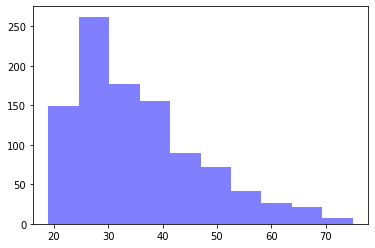

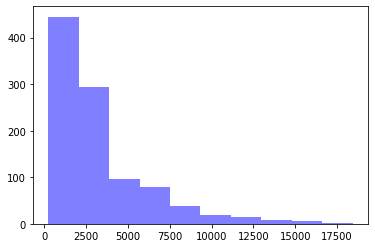

In [ ]:
plt.hist(data['Age'], facecolor='blue', alpha=0.5)
plt.show()

plt.hist(data['Credit amount'], facecolor='blue', alpha=0.5)
plt.show()

(b) Which variables should be transformed? Plot the histograms of transformed variables and ex

# Feature Engineering

Three columns, Housing, Saving accounts and Checking accounts are not plotted as they are not integers. So we will transform those columns using one-hot encoding

In [ ]:
replaceStruct = {"Housing": {"own":1,"free":0,"rent":-1}, 
                 "Saving accounts": {"little":-1, "moderate":0, "quite rich":1, "rich": 2}, 
                 "Checking account": {"little":-1, "moderate":0, "rich": 1},
                "Sex": {"male":1,"female":0},
                 "Purpose": {"car":0, "radio/TV":1,"furniture/equipment":2,"business":3,"education ":4,"repairs":5,"domestic appliances":6,"vacation/others":7},
                 "Credit_BAD_GOOD": {1:1,2:0}}

In [ ]:
data = data.replace(replaceStruct)

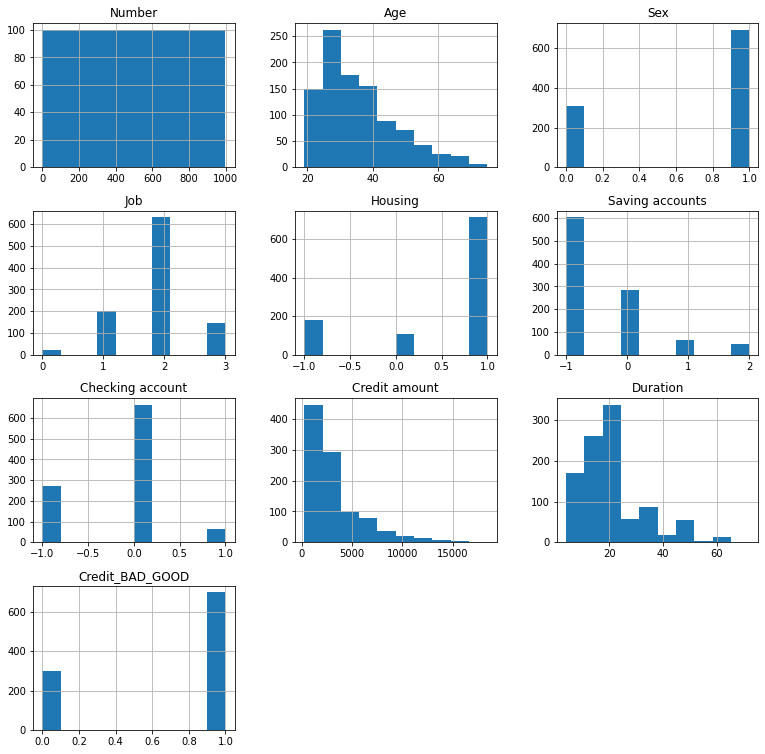

In [ ]:
data.hist(figsize=(13,13))
plt.show() #to show plots if the code is not run as a notebook

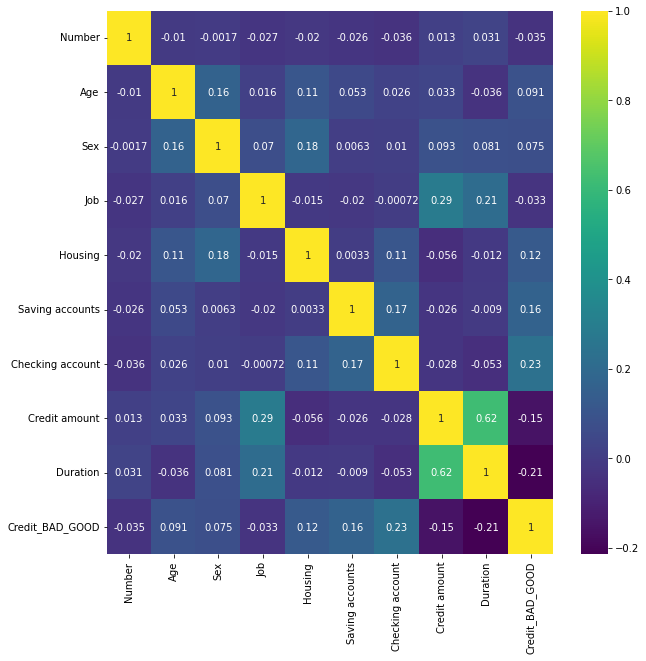

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap='viridis',annot=True)
#This figure shows the correlation of each column with the other columns

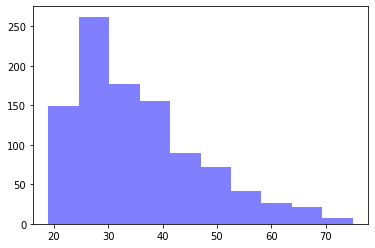

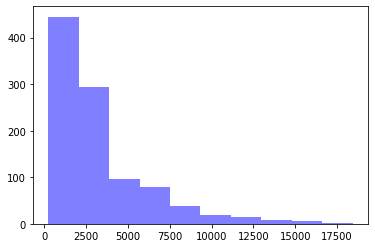

In [ ]:
plt.hist(data['Age'], facecolor='blue', alpha=0.5)
plt.show()

plt.hist(data['Credit amount'], facecolor='blue', alpha=0.5)
plt.show()

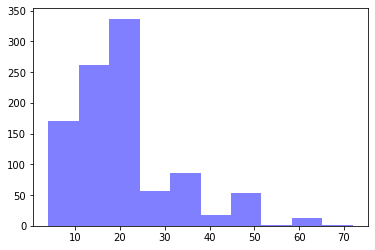

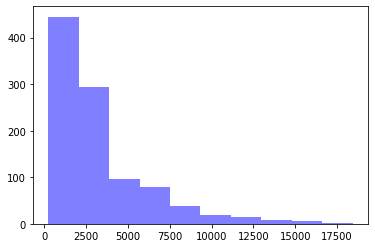

In [ ]:
plt.hist(data['Duration'], facecolor='blue', alpha=0.5)
plt.show()

plt.hist(data['Credit amount'], facecolor='blue', alpha=0.5)
plt.show()

In [ ]:
#Choosing potential features for use in model and adding to a new dataframe
new_data = data[['Age','Duration','Credit amount','Credit_BAD_GOOD']]

Part c: Plot variables versus Credit_BAD_GOOD and explain your finding.



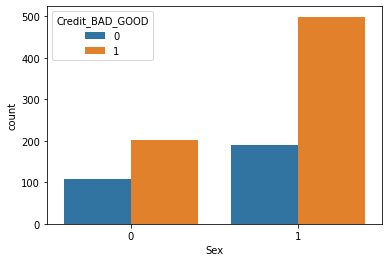

In [ ]:
sns.countplot(x= 'Sex', data = data, hue= 'Credit_BAD_GOOD')
#Explanation

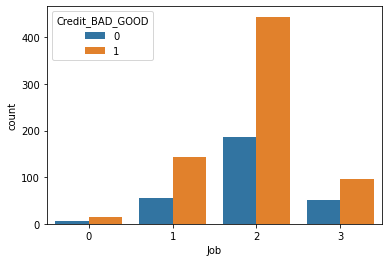

In [ ]:
sns.countplot(x= 'Job', data = data, hue= 'Credit_BAD_GOOD')
#Explanation

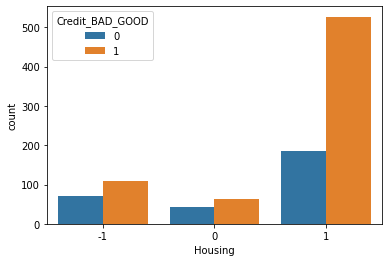

In [ ]:
sns.countplot(x= 'Housing', data = data, hue= 'Credit_BAD_GOOD')
#Explanation

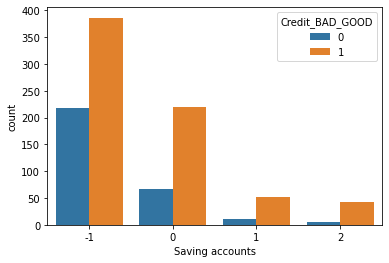

In [ ]:
sns.countplot(x= 'Saving accounts', data = data, hue= 'Credit_BAD_GOOD')
#Explanation

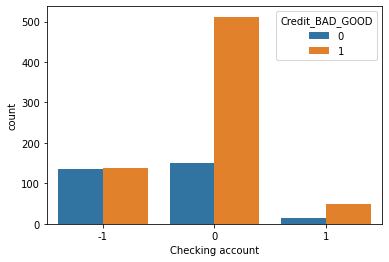

In [ ]:
sns.countplot(x= 'Checking account', data = data, hue= 'Credit_BAD_GOOD')
#Explanation

(d) In this model variable Credit_BAD_GOOD will be used as dependent variable. Investigate statistically and visually this variable and suggest an appropriate method to deal with problem. Why we cannot use ordinary regression.

Resampling

In [ ]:
from sklearn.utils import resample

In [ ]:
credit_majority = data[data.Credit_BAD_GOOD == 0]
credit_minority = data[data.Credit_BAD_GOOD == 1]

In [ ]:
credit_minority_upsampled = resample(credit_minority, replace = True, n_samples =  600, random_state = 666)

## Combine classes

credit_upscaled = pd.concat([credit_majority, credit_minority_upsampled])

In [ ]:
credit_upscaled.Credit_BAD_GOOD.value_counts()

1    600
0    300
Name: Credit_BAD_GOOD, dtype: int64

In [ ]:
x= credit_upscaled[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration']]
y = credit_upscaled['Credit_BAD_GOOD']

In [ ]:
# Creating a copy to avoid corruption of Data.
x1 = x.copy()

## Data Standardisation: Normalization of Numerical Columns

In [ ]:
#Given that Credit_BAD_GOOD is the dependent variable, we cannot use ordinary regression as the dependent variable is a categorical variable. We will therefor use logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#### Normalizing the Dataset
ss = StandardScaler()

x_normal = ss.fit_transform(x1)


Now we do a cross model validation to see which is the best method to deal with the problem

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_normal, y, test_size=0.25, stratify=y, random_state = 101)


# print proportions
print('train: {}% | Test: {}%'.format( round(len(y_train)/len(y),2), 
                                                        round(len(y_test)/len(y),2) ) )



train: 0.75% | Test: 0.25%


In [ ]:
## Classification Algorithms

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('Ada', AdaBoostClassifier()))
models.append(('Grad', GradientBoostingClassifier()))

# Model Evaluation

result = []
model_names = []
scoring = ['accuracy', 'recall', 'precision', 'roc_auc']

for model_name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results1 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[0])
    cv_results2 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[1])
    cv_results3 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[2])
    cv_results4 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[3])
    model_names.append(model_name)
    msg = "%s:\n ACCURACY = %f, RECALL=(%f), PRECISION=(%f), ROC-AUC=(%f)" % (model_name, cv_results1.mean(),cv_results2.mean(), cv_results3.mean(), cv_results4.mean())
    print(msg)

LR:
 ACCURACY = 0.711084, RECALL=(0.890775), PRECISION=(0.730219), ROC-AUC=(0.707696)
KNN:
 ACCURACY = 0.691901, RECALL=(0.856009), PRECISION=(0.729748), ROC-AUC=(0.691254)
SGD:
 ACCURACY = 0.598398, RECALL=(0.741888), PRECISION=(0.736567), ROC-AUC=(0.601920)
DT:
 ACCURACY = 0.722937, RECALL=(0.826573), PRECISION=(0.771395), ROC-AUC=(0.655123)
SVC:
 ACCURACY = 0.724363, RECALL=(0.871501), PRECISION=(0.752123), ROC-AUC=(0.732314)
RF:
 ACCURACY = 0.757002, RECALL=(0.901348), PRECISION=(0.763638), ROC-AUC=(0.827271)
Ada:
 ACCURACY = 0.718371, RECALL=(0.864753), PRECISION=(0.746776), ROC-AUC=(0.727878)
Grad:
 ACCURACY = 0.737862, RECALL=(0.892009), PRECISION=(0.751914), ROC-AUC=(0.755909)


Therefore we will be using logistic regression. It's simple, explainable, and has the best accuracy and ROC-AUC curve compared to the rest

e) Which variables have influence to predict the status of Credit Card? Explain the results as well as goodness of fit criteria. 

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import zscore

LRPipeline2 = Pipeline([( 'LogReg', LogisticRegression(random_state=None)) ])

params = dict({'LogReg__max_iter':[100,200,300,400,500] ,'LogReg__penalty': ['l2'],'LogReg__C': [0.01,0.1,0.5,0.9,1,5,10], 'LogReg__tol': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'LogReg__solver': ['newton-cg','sag','lbfgs']})

GSLR2 = GridSearchCV(LRPipeline2, params, cv=10, scoring='accuracy')

In [ ]:
GSLR2.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('LogReg', LogisticRegression())]),
             param_grid={'LogReg__C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'LogReg__max_iter': [100, 200, 300, 400, 500],
                         'LogReg__penalty': ['l2'],
                         'LogReg__solver': ['newton-cg', 'sag', 'lbfgs'],
                         'LogReg__tol': [0.0001, 0.001, 0.01, 0.1, 1, 100.0]},
             scoring='accuracy')

In [ ]:
# Fetching the best parameters for Model building
GSLR2.best_params_

{'LogReg__C': 1,
 'LogReg__max_iter': 100,
 'LogReg__penalty': 'l2',
 'LogReg__solver': 'sag',
 'LogReg__tol': 0.1}

In [ ]:
# Predcited probability of each class.
y_pred_prob2 = GSLR2.predict_proba(x_test)

# Predicted value of each class
y_pred2 = GSLR2.predict(x_test)

In [ ]:
# Model Accuracy on the Test Set

GSLR2.score(x_test, y_test)

0.72

f) Report the confusion matrix and ROC plot.

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
cMatrix2 = confusion_matrix(y_test, y_pred2)
print(cMatrix2)
print("Transactions which were falsely classified as DEFAULT =  %.1f Percent" %(cMatrix2[0][1]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were falsely classified as NOT-DEFAULT = %.1f Percent"%(cMatrix2[1][0]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were truly classified as DEFAULT = %.1f Percent"% (cMatrix2[1][1]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were truly classified as NOT-DEFAULT = %.1f Percent"% (cMatrix2[0][0]/ sum(sum(cMatrix2))*100 ))

[[ 31  44]
 [ 19 131]]
Transactions which were falsely classified as DEFAULT =  19.6 Percent
Transactions which were falsely classified as NOT-DEFAULT = 8.4 Percent
Transactions which were truly classified as DEFAULT = 58.2 Percent
Transactions which were truly classified as NOT-DEFAULT = 13.8 Percent


0.6433333333333333


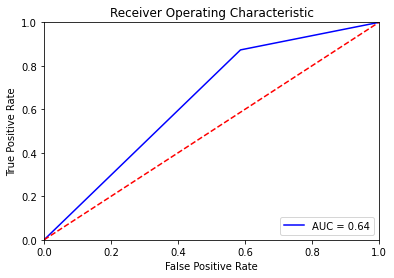

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred2)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

g) Real-world data often contain errors; with using graphical analysis of the data find unexpected observations.

In [ ]:
print(cMatrix2)
print("Transactions which were falsely classified as DEFAULT =  %.1f Percent" %(cMatrix2[0][1]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were falsely classified as NOT-DEFAULT = %.1f Percent"%(cMatrix2[1][0]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were truly classified as DEFAULT = %.1f Percent"% (cMatrix2[1][1]/ sum(sum(cMatrix2))*100 ) )
print("Transactions which were truly classified as NOT-DEFAULT = %.1f Percent"% (cMatrix2[0][0]/ sum(sum(cMatrix2))*100 ))

[[ 31  44]
 [ 19 131]]
Transactions which were falsely classified as DEFAULT =  19.6 Percent
Transactions which were falsely classified as NOT-DEFAULT = 8.4 Percent
Transactions which were truly classified as DEFAULT = 58.2 Percent
Transactions which were truly classified as NOT-DEFAULT = 13.8 Percent


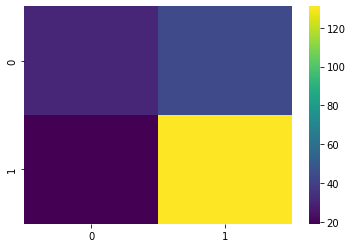

In [ ]:
sns.heatmap(cMatrix2,cmap='viridis')

Test False Negative Rate : 16.9%
Test False Positive Rate : 18.7%
As real world data contains error our error percentage is approximately 17% and 19% with the best fitted model.

#Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier

#Create Decision Tree classifier object
clf = DecisionTreeClassifier()

#Train Decision Tree Classifier
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7155555555555555


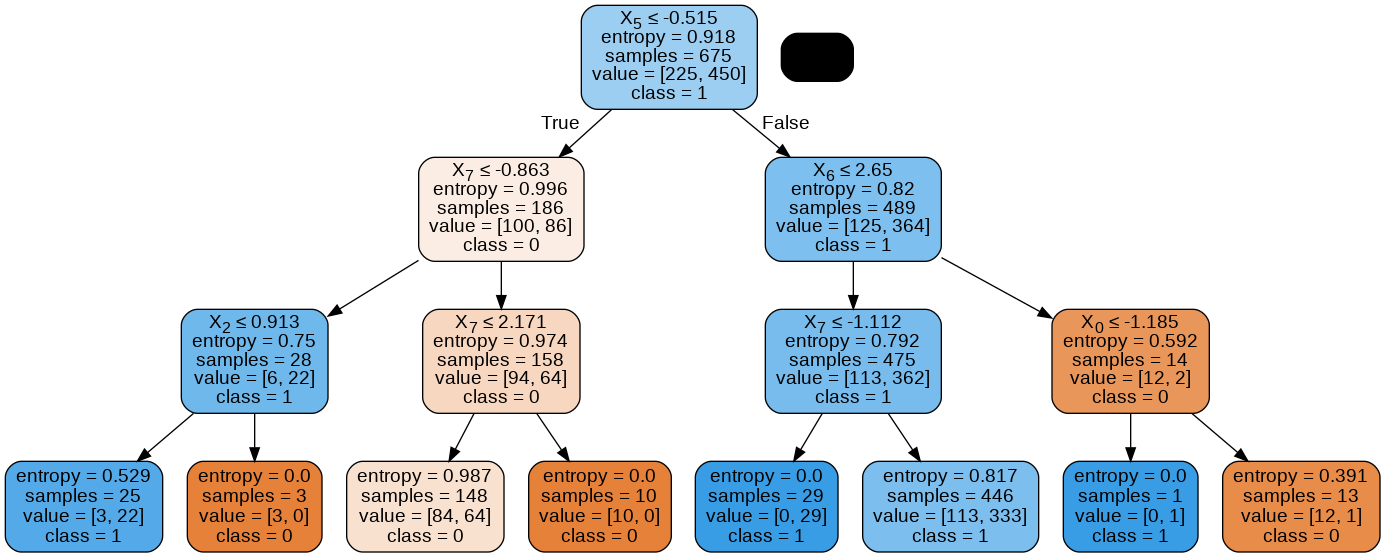

In [ ]:
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('credit_card.png')
Image(graph.create_png())

In [ ]:
#Create Decision Tree Classifier Object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)

#Train Decision Tree Classifier
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7066666666666667
